In [34]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [35]:
#Download Fashion MNIST dataset from Zalando
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [36]:
#We obtain in separate variables the training data (60k) and tests (10k)
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

In [37]:
#Labels of the 10 possible categories
nombres_clases = metadatos.features['label'].names

In [ ]:
nombres_clases

In [39]:
#Normalization function for the data (Go from 0-255 to 0-1)
#Makes the network learn better and faster
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Here it goes from 0-255 to 0-1
  return imagenes, etiquetas

#Normalize the training and test data with the function we did
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#Add to cache (use memory instead of disk, faster training)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

In [ ]:
#Show an image of the test data
for imagen, etiqueta in datos_entrenamiento.take(1):
  break
imagen = imagen.numpy().reshape((28,28)) #resize

import matplotlib.pyplot as plt


plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:

plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [42]:
#Create the model
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 - blanco y negro
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])

In [43]:
#Compile
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [44]:
#The data numbers in training and testing (60k and 10k)
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples

In [ ]:
print(num_ej_entrenamiento)
print(num_ej_pruebas)

In [46]:

TAMANO_LOTE = 32

#Shuffle and repeat cause the data to be randomly shuffled so that the network
#don't learn the order of things
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [47]:
import math

#Train
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch= math.ceil(num_ej_entrenamiento/TAMANO_LOTE))

Epoch 1/5
1875/1875 [==============================] - 12s 3ms/step - loss: 0.5282 - accuracy: 0.8148
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3944 - accuracy: 0.8573
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3496 - accuracy: 0.8726
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3322 - accuracy: 0.8774
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3149 - accuracy: 0.8843


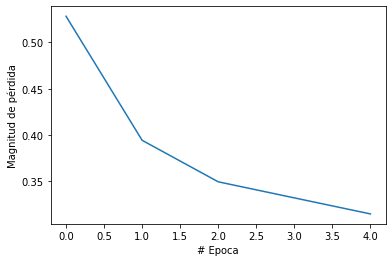

In [48]:
#Ver la funcion de perdida
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [50]:
#predicting
imagen = imagenes_prueba[4] 
imagen = np.array([imagen])
prediccion = modelo.predict(imagen)

print("Prediccion: " + nombres_clases[np.argmax(prediccion[0])])

Prediccion: Sandal
